> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luciano Belo de Alcântara Júnior
* **Matrícula:**  3897

# Prova 2

In [3]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lucianobajr/CCF-425/main/PROVA-2/usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABW6R5JB3HCACLAXPQQKFWC4YXCS7TA

--2022-07-28 13:06:51--  https://raw.githubusercontent.com/lucianobajr/CCF-425/main/PROVA-2/usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABW6R5JB3HCACLAXPQQKFWC4YXCS7TA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866640 (846K) [text/plain]
Saving to: ‘usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABW6R5JB3HCACLAXPQQKFWC4YXCS7TA’

usuarios_cartao_cre 100%[===================>] 846.33K  --.-KB/s    in 0.03s   

2022-07-28 13:06:52 (25.9 MB/s) - ‘usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABW6R5JB3HCACLAXPQQKFWC4YXCS7TA’ saved [866640/866640]



In [6]:
dataframe = pd.read_csv("usuarios_cartao_credito-prova.csv?token=GHSAT0AAAAAABW6R5JB3HCACLAXPQQKFWC4YXCS7TA")
dataframe

,Id_Cliente,Indicador_Status,Idade,Sexo,n_dependentes,nivel_educacao,estado_civil,renda,categoria_cartao,meses_contrato,n_produtos,limite_credito,total_transacoes
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,62


# 1) Utilizando regressão linear, faça um modelo para estimar o limite de crédito de uma pessoa. Avalie a qualidade do modelo, buscando encontrar as melhores combinações de atributos para essa previsão

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
dataframe.dtypes

Id_Cliente            int64
Indicador_Status     object
Idade                 int64
Sexo                 object
n_dependentes         int64
nivel_educacao       object
estado_civil         object
renda                object
categoria_cartao     object
meses_contrato        int64
n_produtos            int64
limite_credito      float64
total_transacoes      int64
dtype: object

In [12]:
dataframe.describe()

,Id_Cliente,Idade,n_dependentes,meses_contrato,n_produtos,limite_credito,total_transacoes
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,8631.953698,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,9088.776650,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,1438.300000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2555.000000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,4549.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,11067.500000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,34516.000000,139.000000


In [135]:
dataframe.dropna()

,Id_Cliente,Indicador_Status,Idade,Sexo,n_dependentes,nivel_educacao,estado_civil,renda,categoria_cartao,meses_contrato,n_produtos,limite_credito,total_transacoes
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,62


In [7]:
dataset = dataframe
dataset['Sexo'] = dataset['Sexo'].str.replace('F','1')
dataset['Sexo'] = dataset['Sexo'].str.replace('M','0')
dataset['Sexo'] = dataset['Sexo'].astype(int)

In [8]:
types = dataset['nivel_educacao'].unique()
types

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [9]:
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('High School','0')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Graduate','1')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Uneducated','2')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Unknown','3')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('College','4')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Post-Graduate','5')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Doctorate','6')
dataset['nivel_educacao'] = dataset['nivel_educacao'].str.replace('Post-1','7')

In [10]:
dataset['nivel_educacao'] = dataset['nivel_educacao'].astype(int)

In [11]:
types_civil = dataset['estado_civil'].unique()
types_civil

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [12]:
dataset['estado_civil'] = dataset['estado_civil'].str.replace('Married','0')
dataset['estado_civil'] = dataset['estado_civil'].str.replace('Single','1')
dataset['estado_civil'] = dataset['estado_civil'].str.replace('Unknown','2')
dataset['estado_civil'] = dataset['estado_civil'].str.replace('Divorced','3')
dataset['estado_civil'] = dataset['estado_civil'].astype(int)

In [13]:
types_renda = dataset['renda'].unique()
types_renda

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
dataset['renda'] = pd.factorize(dataset['renda'])[0] + 1

In [15]:
dataset['categoria_cartao'] = pd.factorize(dataset['categoria_cartao'])[0] + 1

In [17]:
dataset['Indicador_Status'] = pd.factorize(dataset['Indicador_Status'])[0] + 1

In [16]:
dataset.dtypes

Id_Cliente            int64
Indicador_Status     object
Idade                 int64
Sexo                  int64
n_dependentes         int64
nivel_educacao        int64
estado_civil          int64
renda                 int64
categoria_cartao      int64
meses_contrato        int64
n_produtos            int64
limite_credito      float64
total_transacoes      int64
dtype: object

In [ ]:
sns.pairplot(dataframe)

## Regressão Linear com variáveis individuais

### Sexo

In [86]:
X = dataset.Sexo
Y = dataset.limite_credito
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [-7661.82068932]
R2 (score):  0.17707791685760688


### Nivel educação

In [87]:
X = dataset.nivel_educacao
Y = dataset.limite_credito
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [11.01032355]
R2 (score):  5.334453682115381e-06


### Estado Civil

In [92]:
X = dataset.estado_civil
Y = dataset.limite_credito
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [548.38234571]
R2 (score):  0.0028182965001187776


### Renda

In [115]:
X = dataset.renda
Y = dataset.limite_credito
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [1038.97757905]
R2 (score):  0.030805191151417666


### Idade

In [116]:
X = dataset.Idade
Y = dataset.limite_credito
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [2.80733435]
R2 (score):  6.131701936751277e-06


**Resposta**: Podemos observar que, individualmente, a variável que melhor pode estimar o limite de crédito são as valores com ajuste muito mais positivo do que as demais variáveis, sendo que as com melhores resultados foram `Renda` e `Estado civil`

## Regressão Linear com múltiplas variáveis

In [148]:
dataset

,Id_Cliente,Indicador_Status,Idade,Sexo,n_dependentes,nivel_educacao,estado_civil,renda,categoria_cartao,meses_contrato,n_produtos,limite_credito,total_transacoes
0,768805383,1,45,0,3,0,0,1,1,39,5,12691.0,42
1,818770008,1,49,1,5,1,1,2,1,44,6,8256.0,33
2,713982108,1,51,0,3,1,0,3,1,36,4,3418.0,20
3,769911858,1,40,1,4,0,2,2,1,34,3,3313.0,20
4,709106358,1,40,0,3,2,0,1,1,21,5,4716.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,0,2,1,1,4,1,40,3,4003.0,117
10123,710638233,2,41,0,2,3,3,4,1,25,4,4277.0,69
10124,716506083,2,44,1,1,0,0,2,1,36,5,5409.0,60
10125,717406983,2,30,0,2,1,2,4,1,36,4,5281.0,62


In [147]:
X = dataset.drop('limite_credito',axis = 1)
Y = dataset.limite_credito
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         limite_credito   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     674.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:06:11   Log-Likelihood:            -1.0370e+05
No. Observations:               10127   AIC:                         2.074e+05
Df Residuals:                   10114   BIC:                         2.075e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2137.3369   1552.379  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [149]:
X = dataset.drop('Sexo',axis = 1)
X = dataset.drop('Indicador_Status',axis = 1)
Y = dataset.limite_credito
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         limite_credito   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.462e+27
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:12:15   Log-Likelihood:             1.8482e+05
No. Observations:               10127   AIC:                        -3.696e+05
Df Residuals:                   10114   BIC:                        -3.695e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.996e-11   6.31e-10  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Resposta**: Realizadas diversas Regressões Lineares, pode-ser inferir que as variáveis `Sexo` e `Indicador_Status` exercem pequeno impacto no resultado final da linearlização e portanto podem ser retiradas do processo. Nota-se que o valor de $R^2$ antes de retirarmos as colunas `Sexo` e `Indicator_Status` era de *0.444* e após retirados passou a ser *1.000*

# 2) Utilizando aprendizado não supervisionado, crie um modelo para separar os usuários em 4 grupos.

In [19]:
from sklearn import cluster

from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
sns.set(style='ticks')
sns.pairplot(dataset, hue='categoria_cartao')
plt.show()

In [51]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(dataframe.drop('categoria_cartao', axis=1))

KMeans(n_clusters=2)

In [52]:
np.set_printoptions(suppress=True)
print(k_means.cluster_centers_.round(3))
dataframe.groupby('categoria_cartao').mean()

[[7.90577480e+08 1.13700000e+00 4.63860000e+01 5.14000000e-01
  2.35600000e+00 2.09500000e+00 7.71000000e-01 3.01500000e+00
  3.69970000e+01 3.82200000e+00 8.62249800e+03 6.46980000e+01]
 [7.15149785e+08 1.17200000e+00 4.62980000e+01 5.36000000e-01
  2.34200000e+00 2.06800000e+00 7.53000000e-01 3.02400000e+00
  3.54290000e+01 3.80800000e+00 8.63637400e+03 6.49340000e+01]]


,Id_Cliente,Indicador_Status,Idade,Sexo,n_dependentes,nivel_educacao,estado_civil,renda,meses_contrato,n_produtos,limite_credito,total_transacoes
categoria_cartao,,,,,,,,,,,,
1,7.391203e+08,1.160979,46.372404,0.540589,2.336477,2.073442,0.750106,3.016003,35.960682,3.848665,7363.780002,64.028190
2,7.381368e+08,1.181034,45.439655,0.327586,2.672414,2.043103,0.836207,2.965517,35.525862,3.008621,28416.370690,81.517241
3,7.405147e+08,1.147748,45.679279,0.378378,2.439640,2.109910,0.888288,3.100901,35.452252,3.421622,25277.836036,74.700901
4,7.351706e+08,1.250000,47.500000,0.450000,2.450000,2.800000,0.850000,3.600000,36.250000,2.300000,30283.450000,86.950000


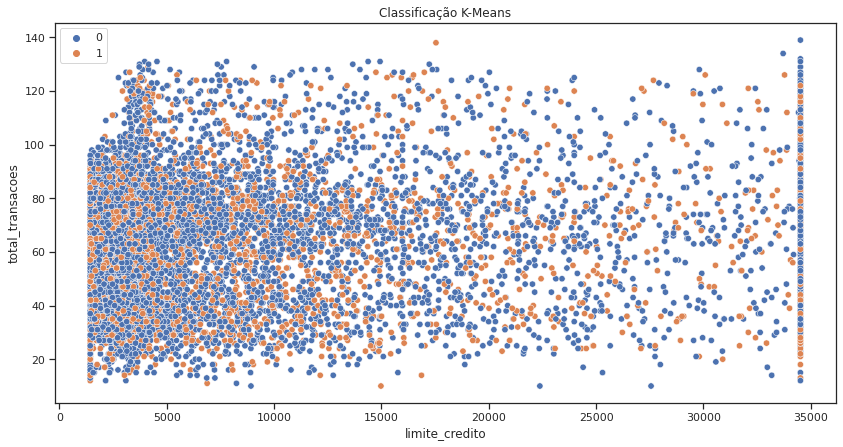

In [34]:
def plot_cluster(model, df, attr_x, attr_y):
  plt.figure(figsize=(14,7))
  sns.scatterplot(x=df[attr_x], y=df[attr_y], hue=model.labels_, s=40)
  plt.title('Classificação K-Means') 
    
  plt.show()
plot_cluster(k_means, dataframe, 'limite_credito', 'total_transacoes')

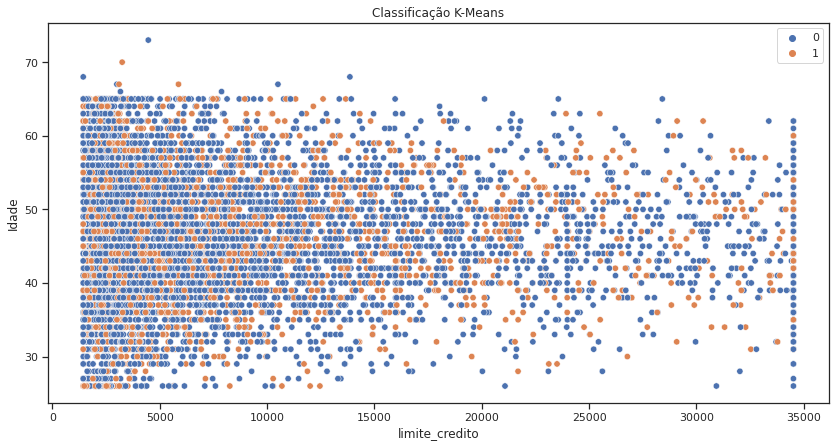

In [35]:
plot_cluster(k_means, dataframe, 'limite_credito', 'Idade')

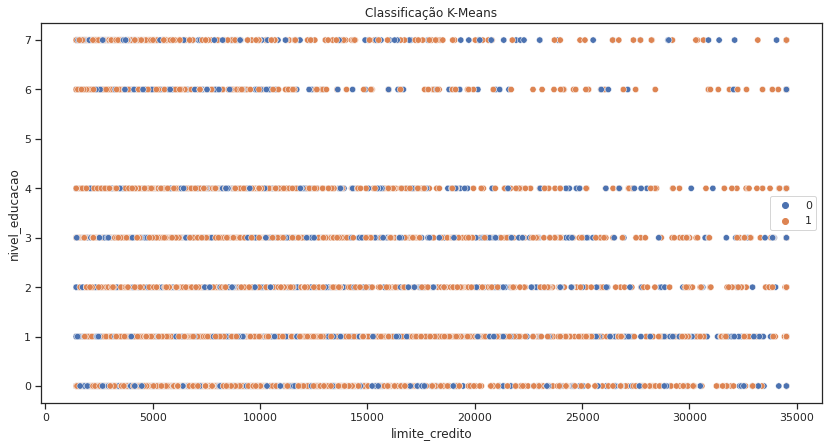

In [72]:
plot_cluster(k_means, dataframe, 'limite_credito', 'nivel_educacao')

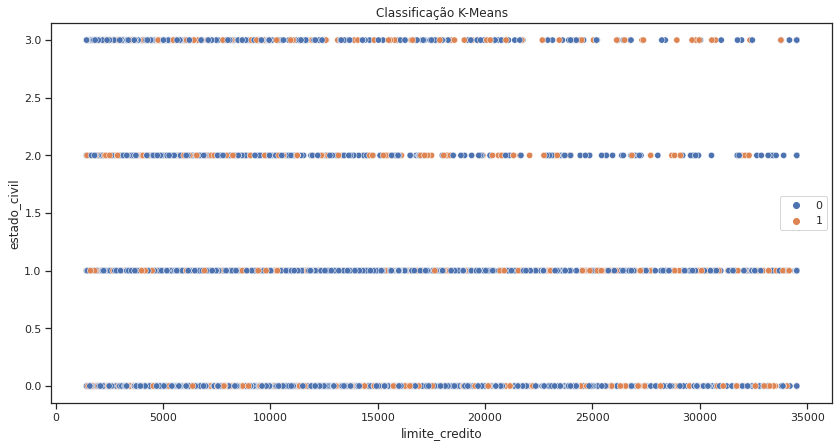

In [44]:
plot_cluster(k_means, dataframe, 'limite_credito', 'estado_civil')

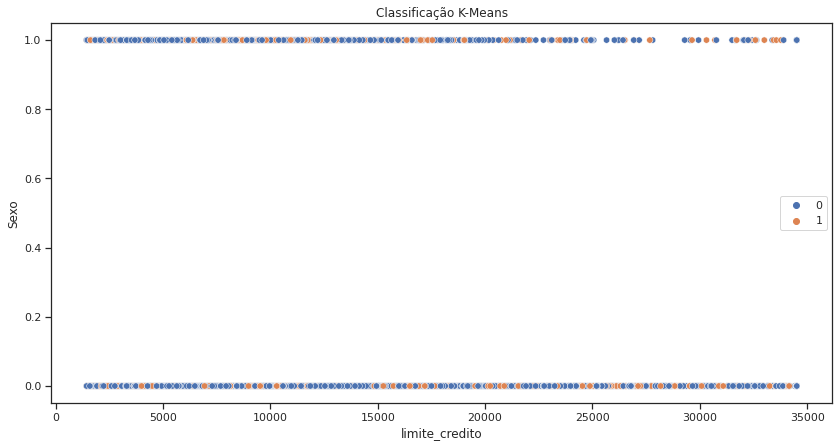

In [45]:
plot_cluster(k_means, dataframe, 'limite_credito', 'Sexo')

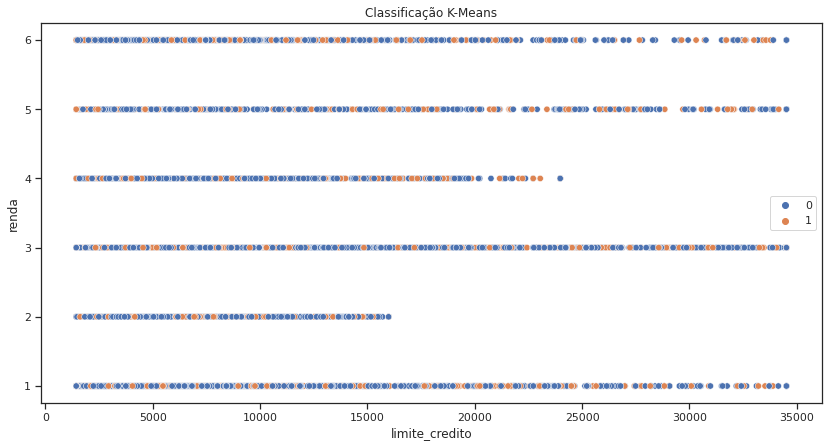

In [46]:
plot_cluster(k_means, dataframe, 'limite_credito', 'renda')

**Resposta:** Com os gráficos apresentados, é possível observar que houve ajuste dos dados de forma coerente, sendo que é possível observar uma boa separação das classes. Também pode-se observar os valores printados antes dos gráficos.

## Análise de silhueta

In [77]:
dataframe_f = dataframe.drop('categoria_cartao', axis=1);
dataframe_f = dataframe_f.drop('limite_credito', axis=1);
k_means = KMeans(n_clusters=2, random_state=1).fit(dataframe_f)
labels = k_means.labels_
metrics.silhouette_score(dataframe_f, labels, metric='euclidean')

0.8578414063755008

In [78]:
dataframe_f = dataframe.drop('categoria_cartao', axis=1);
dataframe_f = dataframe_f.drop('Idade', axis=1);
k_means = KMeans(n_clusters=2, random_state=1).fit(dataframe_f)
labels = k_means.labels_
metrics.silhouette_score(dataframe_f, labels, metric='euclidean')

0.8578405199965893

In [79]:
dataframe_f = dataframe.drop('categoria_cartao', axis=1);
dataframe_f = dataframe_f.drop('Idade', axis=1);
dataframe_f = dataframe_f.drop('Sexo', axis=1);
dataframe_f = dataframe_f.drop('renda', axis=1);

k_means = KMeans(n_clusters=2, random_state=1).fit(dataframe_f)
labels = k_means.labels_
metrics.silhouette_score(dataframe_f, labels, metric='euclidean')

0.8578405199966519

**R:** Realizada uma análise mais ampla de qual atributo exerce maior influência na silhueta, é possível perceber que o algoritmo utilizou apenas o atributo `limite_credito` para determinar qual a categoria de credito, o que evidencia que esses parâmetros estão bastante relacionados, porém evidencia também uma fragilidade desse modelo de aprendizado não supervisionado, que acabou deixando de utilzar os demais atributos para realizar a marcação como qual a categoria de credito. Dessa forma, não fica claro se essa é um bom modelo, uma vez que, apesar do alto score de silhueta, o algoritmo confia em apenas um atributo, que é `limite_credito`.